In [1]:
# import required libraries
import pandas as pd
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
path = r"C:\Users\rashmitha\OneDrive\Desktop\exp_tracking\data (1).csv"

In [3]:
# load dataframe
df = pd.read_csv(path)

In [4]:
df.shape

(8518, 8)

In [5]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [6]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [7]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [8]:
df = df.fillna('Not Specified')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reviewer Name    8518 non-null   object
 1   Review Title     8518 non-null   object
 2   Place of Review  8518 non-null   object
 3   Up Votes         8518 non-null   object
 4   Down Votes       8518 non-null   object
 5   Month            8518 non-null   object
 6   Review text      8518 non-null   object
 7   Ratings          8518 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 532.5+ KB


In [10]:
df['Ratings'].unique()

array([4, 1, 3, 5, 2], dtype=int64)

In [11]:
# remove the values with rating 3
df=df[df['Ratings']!=3]

In [12]:
# Create a mapping dictionary for sentiment labels
sentiment_mapping = {
    1: 'Negative',
    2: 'Negative',
    4: 'Positive',
    5: 'Positive'
}

# Convert numerical values in score to sentiment labels
df['Sentiment'] =df['Ratings'].map(sentiment_mapping)

In [13]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
4,ASHIK P A,Over priced,Not Specified,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,Positive


In [14]:
# Remove 'READ MORE' from 'Review' column
df['Review text'] = df['Review text'].str.replace('READ MORE', '')

In [15]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
4,ASHIK P A,Over priced,Not Specified,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,5,Positive


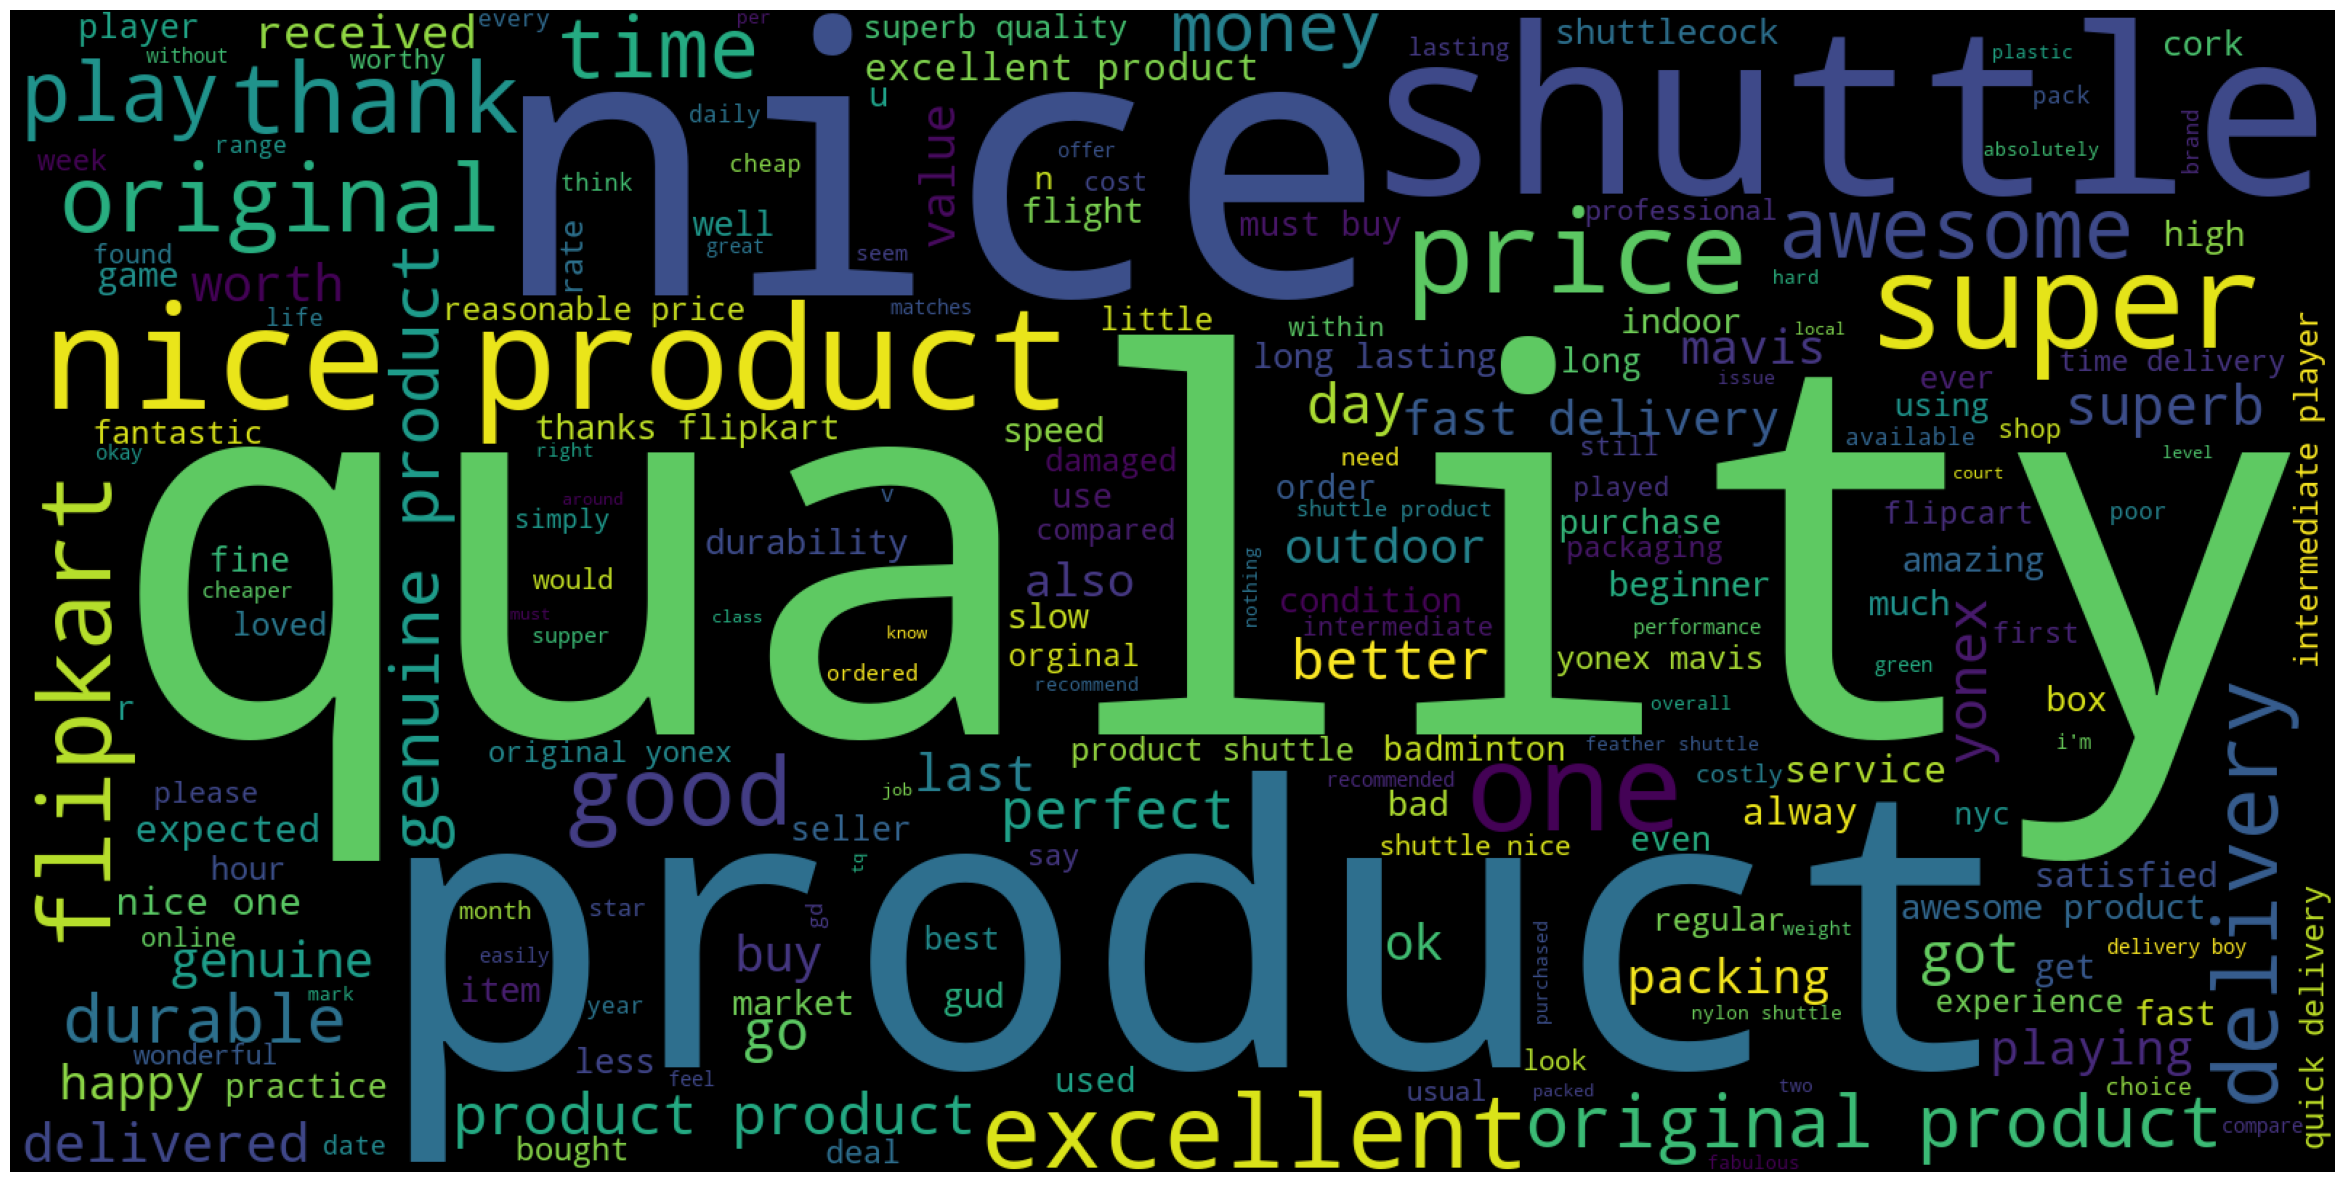

In [16]:
#creating a dataframe for positive sentiments
df_positive=df.loc[df["Sentiment"]=="Positive",:]

#joining the positive sentences 
words=" ".join(df_positive["Review text"]).lower()

#cleaned words

cleaned_words=" ".join([word for word in words.split() if word not in ["love","like","great","taste","really","good","best","br"]]) 
positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

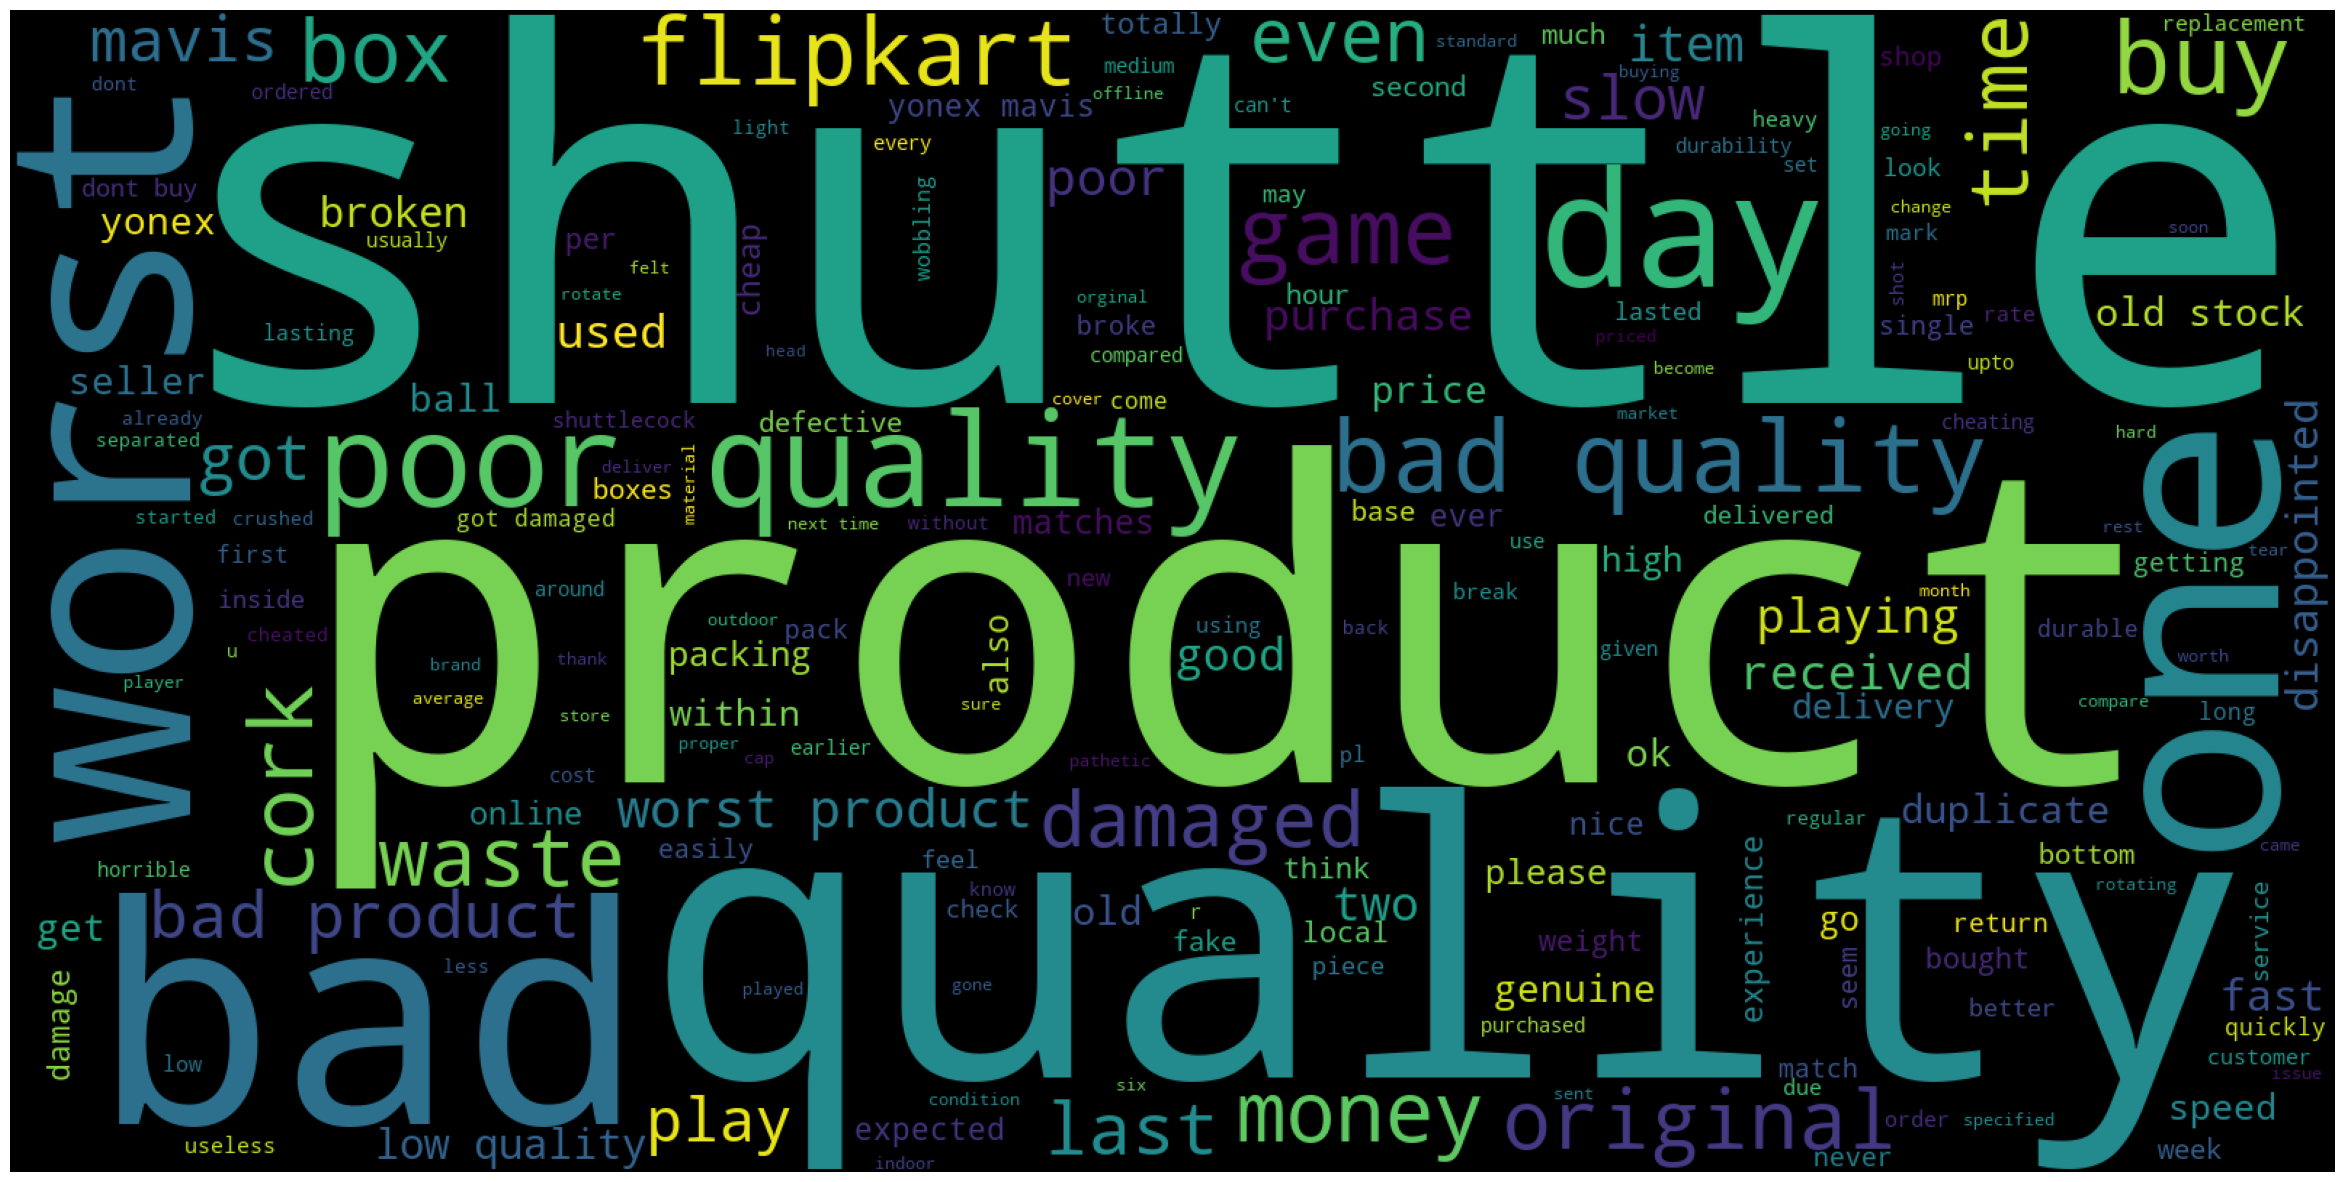

In [17]:
#creating a dataframe for negative sentiments
df_negative=df.loc[df["Sentiment"]=="Negative",:]

#joining the positive sentences 
words=" ".join(df_negative["Review text"]).lower()

#cleaned words
cleaned_words=" ".join([word for word in words.split() if word not in ["love","like","great","taste","really","good","best","br"]]) 
negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

In [18]:
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

In [19]:
df['Sentiment'].unique()

array([1, 0], dtype=int64)

In [20]:
# splitting input and output variables
X=df[['Review text']]
y=df['Sentiment']

In [21]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [22]:
lemmatizer=WordNetLemmatizer()

In [23]:
def preprocess(raw_text):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens =nltk.word_tokenize(sentence)
    
      # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # remove stop words                
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
     # Join and return
    return " ".join(filtered_tokens)

In [24]:
X_train.head()

,Review text
1497,Excellent product
7148,these shuttles are as good as feather shuttle ...
6184,Good for outdoor playing.Not for indoor courts.
2666,Nice shuttles...
2561,Nice product


In [25]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [26]:
X_train = X_train['Review text'].progress_apply(lambda x: preprocess(x))
X_test = X_test['Review text'].progress_apply(lambda x: preprocess(x))

100%|███████████████████████████████████████████████████████████████████████████████████████| 1581/1581 [00:00<00:00, 2441.75it/s]


In [27]:
X_train.columns = ["clean_text"]
X_train.head()

1497                                    excellent product
7148    shuttle good feather shuttle flight life good ...
6184                    good outdoor playing indoor court
2666                                         nice shuttle
2561                                         nice product
Name: Review text, dtype: object

In [28]:
X_train.shape

(6322,)

In [29]:
X_test.columns = ["clean_text"]

In [30]:
X_test.shape

(1581,)

In [31]:
y_train.shape

(6322,)

In [34]:
# Import MLFlow and set the experiment name
import mlflow
mlflow.set_experiment("review_sentiment_prediction")

2024/03/27 14:44:12 INFO mlflow.tracking.fluent: Experiment with name 'review_sentiment_prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/rashmitha/mlruns/992974284523451695', creation_time=1711530852254, experiment_id='992974284523451695', last_update_time=1711530852254, lifecycle_stage='active', name='review_sentiment_prediction', tags={}>

In [35]:
# import the different classifiers from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from joblib import Memory

In [36]:
import warnings

warnings.filterwarnings('ignore')

In [37]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)



pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

In [38]:
# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train, y_train)
    
    print('Score on Test Data: ', grid_search.score(X_test, y_test)) 

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 7.04 s
Score on Test Data:  0.9592792792792793
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Wall time: 16.9 s
Score on Test Data:  0.9520426287744227
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Wall time: 6min 59s
Score on Test Data:  0.9466966966966968


In [39]:
import time
import joblib
import os

In [42]:
dev = "Rashmitha"
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
   # Fit
    start_fit_time = time.time()
    grid_search.fit(X_train, y_train)
    end_fit_time = time.time()

    # Predict
    start_predict_time = time.time()
    y_pred = grid_search.predict(X_test)
    end_predict_time = time.time()
    
    if not os.path.exists('best_models'):
        os.makedirs('best_models')

    # Saving the best model
    joblib.dump(grid_search.best_estimator_, f'best_models/{algo}.pkl')
    model_size = os.path.getsize(f'best_models/{algo}.pkl')

    # Pring Log
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)
    
    print()

    # Start the experiment run
    with mlflow.start_run() as run:
        # Log tags with mlflow.set_tag()
        mlflow.set_tag("developer", dev)

        # Log Parameters with mlflow.log_param()
        mlflow.log_param("algorithm", algo)
        mlflow.log_param("hyperparameter_grid", param_grids[algo])
        mlflow.log_param("best_hyperparameter", grid_search.best_params_)

        # Log Metrics with mlflow.log_metric()
        mlflow.log_metric("train_score", grid_search.best_score_)
        mlflow.log_metric("test_score", grid_search.score(X_test, y_test))
        mlflow.log_metric("fit_time", end_fit_time - start_fit_time)
        mlflow.log_metric("predict_time", end_predict_time - start_predict_time)
        mlflow.log_metric("model_size", model_size)

        # Log Model using mlflow.sklearn.log_model()
        mlflow.sklearn.log_model(grid_search.best_estimator_, f"{algo}_model")

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Train Score:  0.9590165245277416
Test Score:  0.9592792792792793
Fit Time:  2.827040672302246
Predict Time:  0.007004737854003906
Model Size:  100705

********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train Score:  0.953927125212201
Test Score:  0.9513667021654242
Fit Time:  13.422274112701416
Predict Time:  0.008512735366821289
Model Size:  61350

********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Train Score:  0.9481356140935644
Test Score:  0.9466966966966968
Fit Time:  434.0872185230255
Predict Time:  0.009003639221191406
Model Size:  69030

